# Regression:
Regression is a way to understand the relationship between an independent variable or feature and a dependent variable or outcome. 
You can then evaluate the relationship between the independent and dependent variables and predict the outcome. Regression is a field of statistical study that forms a core part of predictive models in machine learning.

#### Three types of Regression:
➡️ Linear Regression
➡️ Multiple Linear Regression
➡️ Logistic Regression

# Linear Regression

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# reading dataset
df=pd.read_csv("C:\\Users\\asus\\homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


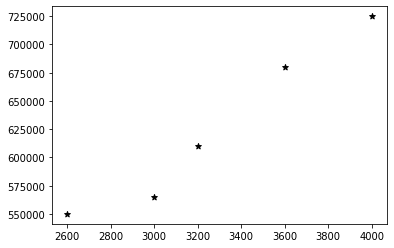

In [3]:
# plotting scatterplot
plt.xlabel='Area'
plt.ylabel='Price'
plt.scatter(df.area, df.price, color='black', marker='*')

In [4]:
# initializing the model
reg=LinearRegression() # initialization
reg

LinearRegression()

In [5]:
# fitting the model
reg.fit(df[['area']], df.price)

LinearRegression()

In [6]:
# predicting a random value
reg.predict([[600000]])

array([81653219.1780822])

In [7]:
# get values of coefficients 
reg.coef_

array([135.78767123])

In [8]:
# get value of intercept
reg.intercept_

180616.43835616432

# Multiple Linear Regression

In [9]:
# reading dataset
df1=pd.read_csv("multiple_linear_regression_dataset.csv")
df1

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [10]:
# to fill null files with method forward fill
df1.fillna(method='ffill', inplace=True)
df1

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [11]:
# separating input and output from dataframe
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
x,y

(array([[25,  1],
        [30,  3],
        [47,  2],
        [32,  5],
        [43, 10],
        [51,  7],
        [28,  5],
        [33,  4],
        [37,  5],
        [39,  8],
        [29,  1],
        [47,  9],
        [54,  5],
        [51,  4],
        [44, 12],
        [41,  6],
        [58, 17],
        [23,  1],
        [44,  9],
        [37, 10]], dtype=int64),
 array([30450, 35670, 31580, 40130, 47830, 41630, 41340, 37650, 40250,
        45150, 27840, 46110, 36720, 34800, 51300, 38900, 63600, 30870,
        44190, 48700], dtype=int64))

In [12]:
# splitting x and y into train and test data
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.25, random_state = 10)

In [13]:
xtrain.shape

(15, 2)

In [14]:
xtest.shape

(5, 2)

In [15]:
# INITIALIZING MODEL
mlr=LinearRegression()
mlr

LinearRegression()

In [16]:
# fitrting the model on training data
mlr.fit(xtrain,ytrain)

LinearRegression()

In [17]:
# get values of coefficients
mlr.coef_

array([ -77.19498661, 2108.98500389])

In [18]:
# get value of intercept
mlr.intercept_

30590.961420115407

In [19]:
# Prediction of test set
y_pred_mlr= mlr.predict(xtest)

print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [36479.46687752 30461.29181229 41416.9121302  38974.42681447
 38665.64686803]


In [20]:
# evaluating model using sklearn.metrics

meanAbErr = metrics.mean_absolute_error(ytest, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(ytest, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(ytest, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 97.66
Mean Absolute Error: 1566.967824411414
Mean Square Error: 3205398.3174849134
Root Mean Square Error: 1790.362621785015


In [21]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': ytest, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
0,37650,36479.466878
1,27840,30461.291812
2,41630,41416.912130
3,41340,38974.426814
4,40130,38665.646868


In [22]:
mlr.score(xtest, ytest)

0.8784174922066037

## Logistic Regression(Multiclass)

In [23]:
# reading dataset
df2=load_digits()
df2

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [24]:
data = dir(df2)
data

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [25]:
df2.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

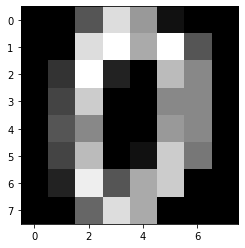

In [26]:
plt.gray()
plt.imshow(df2.images[0])

In [27]:
# get inputs
x = df2.data
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [28]:
# get output
y = df2.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [29]:
# split the inputs and outputs into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 10)

In [30]:
x_train.shape

(1347, 64)

In [31]:
x_test.shape

(450, 64)

In [32]:
# Initializing model
mul_log_reg = LogisticRegression()
mul_log_reg

LogisticRegression()

In [33]:
mul_log_reg.fit(x,y)

LogisticRegression()

In [34]:
# Prediction of test set
y_log_pred = mul_log_reg.predict(x_test)

print("Prediction for test set: {}".format(y_log_pred))

Prediction for test set: [5 2 5 4 8 2 4 3 3 0 8 7 0 1 8 6 9 7 9 7 1 8 6 7 8 8 5 3 5 9 3 3 7 3 4 1 9
 2 5 4 2 1 0 9 2 3 6 1 9 4 4 9 8 4 8 5 9 7 8 0 4 5 8 4 7 9 0 7 1 3 9 3 3 8
 0 7 3 6 5 2 0 8 8 0 1 1 2 8 8 8 2 6 3 4 7 9 8 2 9 2 5 0 8 0 4 8 8 0 6 7 3
 3 9 1 5 4 6 0 8 8 1 1 7 9 9 5 2 3 3 9 7 6 2 5 4 3 3 7 6 7 2 7 4 9 5 1 9 4
 6 1 1 1 4 0 4 9 1 2 3 5 0 3 4 1 5 4 9 3 5 6 4 0 8 6 7 0 9 9 4 7 3 5 2 0 6
 7 5 3 9 7 1 3 2 8 3 3 1 7 1 1 1 7 1 6 7 6 9 5 2 3 5 2 9 5 4 8 2 9 1 5 0 2
 3 9 0 2 0 2 1 0 5 0 6 4 2 1 9 0 9 0 6 9 4 4 9 7 5 6 1 8 7 0 8 6 2 0 1 2 3
 8 4 4 3 5 7 9 7 2 0 2 0 9 2 8 6 3 6 0 6 6 6 7 1 6 1 7 6 0 6 3 7 4 6 2 8 0
 8 4 7 3 3 0 0 2 3 9 7 4 6 7 9 7 6 0 5 6 2 7 1 0 5 1 6 4 7 2 5 1 4 6 6 5 0
 2 9 8 7 9 6 7 0 8 3 5 9 4 1 5 5 4 7 3 9 2 7 3 3 6 6 3 2 1 9 8 3 0 8 7 0 4
 2 1 1 2 9 8 5 1 7 9 8 7 5 4 2 5 5 4 2 4 6 5 0 8 2 0 6 6 3 6 5 3 0 9 7 1 6
 7 4 7 3 2 5 2 1 2 6 8 0 1 9 7 6 9 9 2 9 1 0 9 9 8 3 6 1 1 3 0 6 8 3 2 0 3
 4 5 5 8 8 6]


In [35]:
# coefficients for first test sample
mul_log_reg.coef_[0]

array([ 0.00000000e+00, -5.46391780e-03, -4.12205844e-02,  9.48080491e-02,
        1.13768187e-02, -9.95826932e-02, -1.21931559e-01, -1.19352562e-02,
       -1.54071083e-04, -5.57999250e-02,  3.03461324e-02,  1.54018246e-01,
        8.82075291e-02,  1.30832888e-01, -5.13558328e-02, -1.20002446e-02,
       -1.72007599e-04,  4.15233753e-02,  2.00718529e-01, -3.70446719e-02,
       -3.59404344e-01,  1.96946887e-01,  8.57423291e-02, -4.12106365e-03,
       -7.83051814e-05,  1.53666911e-01,  1.26176097e-01, -2.41788736e-01,
       -5.44915170e-01,  2.88034449e-02,  9.54237061e-02, -2.73168377e-04,
        0.00000000e+00,  1.87441251e-01,  1.20658791e-01, -2.52291663e-01,
       -4.77683256e-01,  4.12370178e-02,  6.75603397e-02,  0.00000000e+00,
       -6.70405886e-04, -2.59453714e-02,  3.00178129e-01, -1.75608761e-01,
       -1.57170841e-01,  1.13914950e-01,  3.51614309e-02, -7.55419613e-04,
       -1.90465385e-03, -1.00834010e-01,  1.23720628e-01, -2.61566909e-02,
        1.48278097e-01,  

In [36]:
# value of intercept
mul_log_reg.intercept_[0]

0.0007798386352525597

In [37]:
meanAbErr = metrics.mean_absolute_error(y_test, y_log_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_log_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_log_pred))
print('R squared: {:.2f}'.format(mul_log_reg.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 100.00
Mean Absolute Error: 0.0
Mean Square Error: 0.0
Root Mean Square Error: 0.0


In [38]:
#Actual value and the predicted value
diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_log_pred})
diff

,Actual value,Predicted value
0,5,5
1,2,2
2,5,5
3,4,4
4,8,8
...,...,...
445,5,5
446,5,5
447,8,8
448,8,8


In [39]:
mul_log_reg.score(x_test,y_test)

1.0